In [2]:
#Important to change the description name from "Einschleusen mit Todesfolge, gewerbs- und bandenm  iges Einschleusen von Ausl ndern gem     97 Aufenthaltsgesetz"
import pandas as pd

# List of years to process
years = [2016, 2017, 2018]

# Function to process each year's data
def process_data(year):
    # Read the CSV for each year
    data = pd.read_csv(f"Opfer_{year}.csv", encoding='ISO-8859-1', sep=';')
    
    # Manually add the year column after reading the data
    data["Jahr"] = year  # Add the year column
    
    # Rename columns as per the template
    data = data.rename(columns={
        'Schluesselzahl der Tat': 'Schluessel', 'Gemeindeschlüssel': 'Gemeindeschluessel',
        'Opfer insgesamt - Anzahl': 'Oper insgesamt', 'Opfer insgesamt maennlich- Anzahl': 'Opfer maennlich', 
        "Opfer insgesamt weiblich- Anzahl": "Opfer weiblich", "Kinder bis unter 6 Jahre - Anzahl": "Opfer - Kinder bis unter 6 Jahre - insgesamt",
        "Kinder bis unter 6 Jahre maennlich- Anzahl": "Opfer - Kinder bis unter 6 Jahre - maennlich", 
        "Kinder bis unter 6 Jahre weiblich - Anzahl": "Opfer - Kinder bis unter 6 Jahre - weiblich",
        "Kinder bis unter 14 Jahre insgesamt": "Opfer Kinder bis 14 Jahre- insgesamt", 
        "Kinder bis unter 14 Jahre insgesamt maennlich": "Opfer Kinder bis 14 Jahre- maennlich", 
        "Kinder bis unter 14 Jahre insgesamt weiblich": "Opfer Kinder bis 14 Jahre- weiblich", 
        "Jugendliche 14 bis unter 18 Jahre insgesamt": "Opfer Jugendliche 14 bis unter 18 Jahre - insgesamt", 
        "Jugendliche 14 bis unter 18 Jahre insgesamt - maennlich": "Opfer Jugendliche 14 bis unter 18 Jahre - maennlich", 
        "Jugendliche 14 bis unter 18 Jahre insgesamt - weiblich": "Opfer Jugendliche 14 bis unter 18 Jahre - weiblich",
        "Heranwachsende 18 bis unter 21 Jahre - Anzahl": "Opfer - Heranwachsende 18 bis unter 21 Jahre - insgesamt", 
        "Heranwachsende 18 bis unter 21 Jahre maennlich - Anzahl": "Opfer - Heranwachsende 18 bis unter 21 Jahre - maennlich", 
        "Heranwachsende 18 bis unter 21 Jahre weiblich - Anzahl": "Opfer - Heranwachsende 18 bis unter 21 Jahre - weiblich", 
        "Erwachsene 60 Jahre und aelter": "Opfer - Erwachsene 60 Jahre und aelter - insgesamt", 
        "Erwachsene 60 Jahre und aelter - maennlich": "Opfer - Erwachsene 60 Jahre und aelter - maennlich", 
        "Erwachsene 60 Jahre und aelter - weiblich": "Opfer - Erwachsene 60 Jahre und aelter - weiblich", 
        "Erwachsene ab 21 Jahre": "Opfer Erwachsene - insgesamt", 
        "Erwachsene ab 21 Jahre - maennlich": "Opfer Erwachsene - maennlich", 
        "Erwachsene ab 21 Jahre - weiblich": "Opfer Erwachsene - weiblich"
    })
    
    # Convert relevant columns to numeric
    for col in data.columns[5:68]:
        data[col] = pd.to_numeric(
            data[col].astype(str).str.replace(',', ''), 
            errors='coerce'
        )
    
    # Calculate combined columns for children and adults
    data["Opfer Kinder 6 bis unter 14 Jahre - insgesamt"] = (
        data["Kinder 6 bis unter 8 Jahre Anzahl"] +
        data["Kinder 8 bis unter 10 Jahre - Anzahl"] +
        data["Kinder 10 bis unter 12 Jahre - Anzahl"] +
        data["Kinder 12 bis unter 14 Jahre - Anzahl"]
    )
    
    data["Opfer Kinder 6 bis unter 14 Jahre - maennlich"] = (
        data["Kinder 6 bis unter 8 Jahre maennlich - Anzahl"] +
        data["Kinder 8 bis unter 10 Jahre maennlich - Anzahl"] +
        data["Kinder 10 bis unter 12 Jahre maennlich- Anzahl"] +
        data["Kinder 12 bis unter 14 Jahre maennlich - Anzahl"]
    )
    
    data["Opfer Kinder 6 bis unter 14 Jahre - weiblich"] = (
        data["Kinder 6 bis unter 8 Jahre weiblich - Anzahl"] +
        data["Kinder 8 bis unter 10 Jahre weiblich - Anzahl"] +
        data["Kinder 10 bis unter 12 Jahre weiblich - Anzahl"] +
        data["Kinder 12 bis unter 14 Jahre weiblich - Anzahl"]
    )
    
    data["Opfer Erwachsene 21 bis unter 60 Jahre - insgesamt"] = (
        data["Erwachsene 21 bis unter 25 Jahre"] +
        data["Erwachsene 25 bis unter 30 Jahre"] +
        data["Erwachsene 30 bis unter 40 Jahre"] +
        data["Erwachsene 40 bis unter 50 Jahre"] +
        data["Erwachsene 50 bis unter 60 Jahre"]
    )

    data["Opfer Erwachsene 21 bis unter 60 Jahre - maennlich"] = (
        data["Erwachsene 21 bis unter 25 Jahre - maennlich"] +
        data["Erwachsene 25 bis unter 30 Jahre - maennlich"] +
        data["Erwachsene 30 bis unter 40 Jahre - maennlich"] +
        data["Erwachsene 40 bis unter 50 Jahre - maennlich"] +
        data["Erwachsene 50 bis unter 60 Jahre - maennlich"]
    )

    data["Opfer Erwachsene 21 bis unter 60 Jahre - weiblich"] = (
        data["Erwachsene 21 bis unter 25 Jahre - weiblich"] +
        data["Erwachsene 25 bis unter 30 Jahre - weiblich"] +
        data["Erwachsene 30 bis unter 40 Jahre - weiblich"] +
        data["Erwachsene 40 bis unter 50 Jahre - weiblich"] +
        data["Erwachsene 50 bis unter 60 Jahre - weiblich"]
    )

    # Drop unnecessary columns
    data.drop(columns=["Kinder 6 bis unter 8 Jahre Anzahl", "Kinder 6 bis unter 8 Jahre maennlich - Anzahl", "Kinder 6 bis unter 8 Jahre weiblich - Anzahl", 
                       "Kinder 8 bis unter 10 Jahre - Anzahl", "Kinder 8 bis unter 10 Jahre maennlich - Anzahl", "Kinder 8 bis unter 10 Jahre weiblich - Anzahl", 
                       "Kinder 10 bis unter 12 Jahre - Anzahl", "Kinder 10 bis unter 12 Jahre maennlich- Anzahl", "Kinder 10 bis unter 12 Jahre weiblich - Anzahl", 
                       "Kinder 12 bis unter 14 Jahre - Anzahl", "Kinder 12 bis unter 14 Jahre maennlich - Anzahl", "Kinder 12 bis unter 14 Jahre weiblich - Anzahl", 
                       "Jugendliche 14 bis unter 16 Jahre - Anzahl", "Jugendliche 14 bis unter 16 Jahre maennlich - Anzahl", "Jugendliche 14 bis unter 16 Jahre weiblich - Anzahl", 
                       "Jugendliche 16 bis unter 18 Jahre - Anzahl", "Jugendliche 16 bis unter 18 Jahre maennlich - Anzahl", "Jugendliche 16 bis unter 18 Jahre weiblich - Anzahl", 
                       "Opfer insgesamt unter 21 Jahre", "Opfer insgesamt unter 21 Jahre - maennlich", "Opfer insgesamt unter 21 Jahre - weiblich", 
                       "Erwachsene 23 bis unter 25 Jahre - Anzahl", "Erwachsene 23 bis unter 25 Jahre maennlich- Anzahl", "Erwachsene 23 bis unter 25 Jahre weiblich - Anzahl", 
                       "Erwachsene 23 bis unter 25 Jahre weiblich - Anzahl", "Erwachsene 21 bis unter 25 Jahre", "Erwachsene 21 bis unter 25 Jahre - maennlich", 
                       "Erwachsene 21 bis unter 25 Jahre - weiblich", "Erwachsene 25 bis unter 30 Jahre", "Erwachsene 25 bis unter 30 Jahre - maennlich", 
                       "Erwachsene 25 bis unter 30 Jahre - weiblich", "Erwachsene 30 bis unter 40 Jahre", "Erwachsene 30 bis unter 40 Jahre - maennlich", 
                       "Erwachsene 30 bis unter 40 Jahre - weiblich", "Erwachsene 40 bis unter 50 Jahre", "Erwachsene 40 bis unter 50 Jahre - maennlich", 
                       "Erwachsene 40 bis unter 50 Jahre - weiblich", "Erwachsene 50 bis unter 60 Jahre", "Erwachsene 50 bis unter 60 Jahre - maennlich", 
                       "Erwachsene 50 bis unter 60 Jahre - weiblich", "Erwachsene 21 bis unter 23 Jahre - Anzahl", "Erwachsene 21 bis unter 23 Jahre maennlich - Anzahl", 
                       "Erwachsene 21 bis unter 23 Jahre weiblich - Anzahl"], inplace=True)

    # Define the new column order
    new_column_order = [
        'Schluessel', 'Straftat', 'Gemeindeschluessel', 'Stadt', 'Fallstatus', 'Oper insgesamt', 'Opfer maennlich', 'Opfer weiblich', 
        'Opfer - Kinder bis unter 6 Jahre - insgesamt', 'Opfer - Kinder bis unter 6 Jahre - maennlich', 'Opfer - Kinder bis unter 6 Jahre - weiblich', 
        'Opfer Kinder 6 bis unter 14 Jahre - insgesamt', 'Opfer Kinder 6 bis unter 14 Jahre - maennlich', 'Opfer Kinder 6 bis unter 14 Jahre - weiblich', 
        'Opfer Kinder bis 14 Jahre- insgesamt', 'Opfer Kinder bis 14 Jahre- maennlich', 'Opfer Kinder bis 14 Jahre- weiblich', 
        'Opfer Jugendliche 14 bis unter 18 Jahre - insgesamt', 'Opfer Jugendliche 14 bis unter 18 Jahre - maennlich', 'Opfer Jugendliche 14 bis unter 18 Jahre - weiblich', 
        'Opfer - Heranwachsende 18 bis unter 21 Jahre - insgesamt', 'Opfer - Heranwachsende 18 bis unter 21 Jahre - maennlich', 
        'Opfer - Heranwachsende 18 bis unter 21 Jahre - weiblich', 'Opfer Erwachsene 21 bis unter 60 Jahre - insgesamt', 
        'Opfer Erwachsene 21 bis unter 60 Jahre - maennlich', 'Opfer Erwachsene 21 bis unter 60 Jahre - weiblich', "Opfer - Erwachsene 60 Jahre und aelter - insgesamt","Opfer - Erwachsene 60 Jahre und aelter - maennlich",
        "Opfer - Erwachsene 60 Jahre und aelter - weiblich",
        'Opfer Erwachsene - insgesamt', 'Opfer Erwachsene - maennlich', 'Opfer Erwachsene - weiblich', 'Jahr'
    ]
    
    # Reorder the columns
    data = data[new_column_order]
    
    # Return the processed data for each year
    return data

# Process data for all years
all_years_data = [process_data(year) for year in years]

# Concatenate all data frames
final_data = pd.concat(all_years_data)

# Save the final concatenated data to a CSV
final_data.to_csv("Cleaning_Opfer_2016-2018.csv", index=False)



In [3]:
import pandas as pd

# Function to process the data
def process_data(df, year):
    
    
    # Convert relevant columns to numeric (assuming the relevant columns are the same)
    for col in df.columns[5:33]:  # Adjust column range if necessary
        df[col] = pd.to_numeric(
            df[col].astype(str).str.replace(',', ''),
            errors='coerce'
        )
    df["Jahr"] = year  # Add the "Jahr" column with the specified year
    
    df = df.rename(columns={'Oper insgesamt ':"Oper insgesamt",
        'Opfer Kinder 6  bis unter 14 Jahre - insgesamt': 'Opfer Kinder 6 bis unter 14 Jahre - insgesamt', 'Opfer Kinder 6  bis unter 14 Jahre - maennlich': 'Opfer Kinder 6 bis unter 14 Jahre - maennlich',
        'Opfer Kinder 6  bis unter 14 Jahre - weiblich': 'Opfer Kinder 6 bis unter 14 Jahre - weiblich'})
    
    return df

# Load each dataset
df_2019 = pd.read_csv("Opfer_2019.csv", encoding='ISO-8859-1', sep=';')
df_2020 = pd.read_csv("Opfer_2020.csv", encoding='ISO-8859-1', sep=';')
df_2021 = pd.read_csv("Opfer_2021.csv", encoding='ISO-8859-1', sep=';')
df_2022 = pd.read_csv("Opfer_2022.csv", encoding='ISO-8859-1', sep=';')
df_2023 = pd.read_csv("Opfer_2023.csv", encoding='ISO-8859-1', sep=';')

# Process each dataset
df_2019 = process_data(df_2019, 2019)
df_2020 = process_data(df_2020, 2020)
df_2021 = process_data(df_2021, 2021)
df_2022 = process_data(df_2022, 2022)
df_2023 = process_data(df_2023, 2023)

# Combine all datasets into one DataFrame
all_years_data = pd.concat([df_2019, df_2020, df_2021, df_2022, df_2023], ignore_index=True)

# Optionally, print the first few rows of the combined dataset
print(all_years_data.head())

# Save the combined dataset to a CSV file
all_years_data.to_csv("Cleaning_Opfer_2019-2023.csv", index=False)

  Schluessel              Straftat  Gemeindeschluessel     Stadt Fallstatus  \
0     ------  Straftaten insgesamt             5334002    Aachen      voll.   
1     ------  Straftaten insgesamt             5334002    Aachen      vers.   
2     ------  Straftaten insgesamt             5334002    Aachen      insg.   
3     ------  Straftaten insgesamt             9761000  Augsburg      voll.   
4     ------  Straftaten insgesamt             9761000  Augsburg      vers.   

   Oper insgesamt  Opfer maennlich  Opfer weiblich  \
0            3828             2252            1576   
1             304              182             122   
2            4132             2434            1698   
3            4879             3198            1681   
4             480              354             126   

   Opfer - Kinder bis unter 6 Jahre - insgesamt  \
0                                            23   
1                                             1   
2                                            24

In [4]:
final_combine=pd.concat([final_data,all_years_data], ignore_index=True)


In [5]:
print(final_combine.head())

# Save the final combined dataset to a CSV file
final_combine.to_csv("combined_data_2016_2023.csv", index=False)

  Schluessel              Straftat  Gemeindeschluessel              Stadt  \
0     ------  Straftaten insgesamt             5334002             Aachen   
1     ------  Straftaten insgesamt             9761000           Augsburg   
2     ------  Straftaten insgesamt             5378004  Bergisch Gladbach   
3     ------  Straftaten insgesamt            11000000             Berlin   
4     ------  Straftaten insgesamt             5711000          Bielefeld   

  Fallstatus  Oper insgesamt  Opfer maennlich  Opfer weiblich  \
0      voll.            4334             2672            1662   
1      voll.            4601             2922            1679   
2      voll.            1228              670             558   
3      voll.           71286            43825           27461   
4      voll.            4245             2412            1833   

   Opfer - Kinder bis unter 6 Jahre - insgesamt  \
0                                            17   
1                                           

EDA

In [12]:
df = pd.read_csv("combined_data_2016_2023.csv", dtype={'Schluessel': str})

In [13]:
#Create dictionaries to rename the rows in the column Straftat

crime_dict = {
    'Vergewaltigung, sexuelle N tigung und sexueller  bergriff im besonders schweren Fall einschl. mit Todesfolge    177, 178 StGB': 'Vergewaltigung und sexuelle Noetigung',
    'Vergewaltigung und sexuelle Noetigung    177 Abs. 2, 3 und 4, 178 StGB': 'Vergewaltigung und sexuelle Noetigung',
    'Vergewaltigung und sexuelle N tigung/ bergriffe    177 Abs. 1, 2, 3, 4, 6, 7, 8 und 9, 178 StGB': 'Vergewaltigung und sexuelle Noetigung',
    'Raub, raeuberische Erpressung und raeuberischer Angriff auf Kraftfahrer    249-252, 255, 316a StGB': 'Raub, raeuberische Erpressung und raeuberischer Angriff auf Kraftfahrer',
    'Raub, r uberische Erpressung und r uberischer Angriff auf Kraftfahrer    249-252, 255, 316a StGB': 'Raub, raeuberische Erpressung und raeuberischer Angriff auf Kraftfahrer',
    'Raub, raeuberische Erpressung auf/gegen Geldinstitute, Postfilialen und -agenturen': 'Raub, raeuberische Erpressung auf/gegen Geldinstitute, Postfilialen und -agenturen',
    'Raub, r uberische Erpressung auf/gegen Geldinstitute, Postfilialen und -agenturen': 'Raub, raeuberische Erpressung auf/gegen Geldinstitute, Postfilialen und -agenturen',
    'Raub, raeuberische Erpressung auf/gegen sonstige Zahlstellen und Geschaefte': 'Raub, raeuberische Erpressung auf/gegen sonstige Zahlstellen und Geschaefte',
    'Raub, r uberische Erpressung auf/gegen sonstige Zahlstellen und Gesch fte': 'Raub, raeuberische Erpressung auf/gegen sonstige Zahlstellen und Geschaefte',
    'Sonstige Raubueberfaelle auf Stra en, Wegen oder Plaetzen': 'Sonstige Raubueberfaelle auf Straßen, Wegen oder Plaetzen',
    'Sonstige Raub berf lle auf Stra en, Wegen oder Pl tzen': 'Sonstige Raubueberfaelle auf Straßen, Wegen oder Plaetzen',
    'Raubueberfaelle in Wohnungen': 'Raubueberfaelle in Wohnungen',
    'Raub berf lle in Wohnungen': 'Raubueberfaelle in Wohnungen',
    'Gefaehrliche und schwere Koerperverletzung, Verstuemmelung weiblicher Genitalien    224, 226, 226a, 231 StGB': 'Gefaehrliche und schwere Koerperverletzung, Verstuemmelung weiblicher Genitalien',
    'Gef hrliche und schwere K rperverletzung, Verst mmelung weiblicher Genitalien    224, 226, 226a, 231 StGB': 'Gefaehrliche und schwere Koerperverletzung, Verstuemmelung weiblicher Genitalien',
    'Vorsaetzliche einfache Koerperverletzung   223 StGB': 'Vorsaetzliche einfache Koerperverletzung',
    'Vors tzliche einfache K rperverletzung   223 StGB': 'Vorsaetzliche einfache Koerperverletzung',
    'Widerstand gegen und t tlicher Angriff auf Vollstreckungsbeamte und gleichstehende Personen    113-115 StGB': 'Widerstand gegen und taetlicher Angriff auf Vollstreckungsbeamte und gleichstehende Personen',
    'Widerstand gegen Vollstreckungsbeamte und gleichstehende Personen    113, 115 StGB': 'Widerstand gegen Vollstreckungsbeamte und gleichstehende Personen',
    'T tlicher Angriff auf Vollstreckungsbeamte und gleichstehende Personen    114, 115 StGB': 'Taetlicher Angriff auf Vollstreckungsbeamte',
    'Gewaltkriminalit t': 'Gewaltkriminalitaet',
    'Mord, Totschlag und T tung auf Verlangen': 'Mord, Totschlag und Toetung auf Verlangen',"Raub, r uberische Erpressung auf/gegen sonstige Kassenr ume und Gesch fte":'Raub, raeuberische Erpressung auf/gegen sonstige Kassenraeume und Geschaefte',"Gef hrliche und schwere K rperverletzung, Verst mmelung weiblicher Genitalien    224, 226, 226a, 231 StGB":'Gefaehrliche und schwere Koerperverletzung, Verstuemmelung weiblicher Genitalien'

}

#Create dictionaries to rename the rows in the column Stadt
cities = {
    'D sseldorf': 'Duesseldorf',
    'F rth': 'Fuerth',
    'G ttingen': 'Goettingen',
    'K ln': 'Koeln',
    'L beck': 'Luebeck',
    'M nchengladbach': 'Moenchengladbach',
    'M lheim an der Ruhr': 'Muelheim an der Ruhr',
    'M nchen': 'Muenchen',
    'M nster': 'Muenster',
    'N rnberg': 'Nuernberg',
    'Osnabr ck': 'Osnabrueck',
    'Saarbr cken': 'Saarbruecken',
    'W rzburg': 'Wuerzburg',
    'Düsseldorf':'Duesseldorf', 
    'Fürth':'Fuerth', 
    'Göttingen':'Goettingen', 
    'Köln':'Koeln', 
    'Lübeck':'Luebeck' ,
    'Mönchengladbach':'Moenchengladbach',
 'Mülheim an der Ruhr':'Muelheim an der Ruhr' ,
 'Nürnberg':'Nuernberg' ,
 'Osnabrück':'Osnabrueck' ,
 'G tersloh':'Guetersloh'
}



# Apply the replacement
df['Straftat'] = df['Straftat'].replace(crime_dict)
df['Stadt'] = df['Stadt'].replace(cities)

df.loc[df['Straftat'].str.contains(r'Gef.?hrliche.*Verst.?mmelung', regex=True, na=False), 'Straftat'] = 'Gefaehrliche und schwere Koerperverletzung, Verstuemmelung weiblicher Genitalien'
df.loc[df['Straftat'].str.contains(r'Raub.*Kassenr.*Gesch', regex=True, na=False), 'Straftat'] = 'Raub, raeuberische Erpressung auf/gegen sonstige Kassenraeume und Geschaefte'



In [42]:

# Check unique values in the 'Fallstatus' column
print("Unique values in Fallstatus column:", df["Fallstatus"].unique())

# Filter: Keep only rows where 'Fallstatus' is 'insg'
df_filtered = df[df["Fallstatus"] == 'insg.']

#Display updated dataset info
print("Updated Data Overview:")
print(df_filtered.info())

# Save cleaned dataset
df_filtered.to_csv("Opfer_combined_clean_2016_2023.csv", index=False, encoding='ISO-8859-1', sep=';')

Unique values in Fallstatus column: ['voll.' 'vers.' 'insg.']
Updated Data Overview:
<class 'pandas.core.frame.DataFrame'>
Index: 9518 entries, 160 to 28553
Data columns (total 33 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Schluessel                                                9518 non-null   object
 1   Straftat                                                  9518 non-null   object
 2   Gemeindeschluessel                                        9518 non-null   int64 
 3   Stadt                                                     9518 non-null   object
 4   Fallstatus                                                9518 non-null   object
 5   Oper insgesamt                                            9518 non-null   int64 
 6   Opfer maennlich                                           9518 non-null   int64 
 7   Opfer weiblich                 

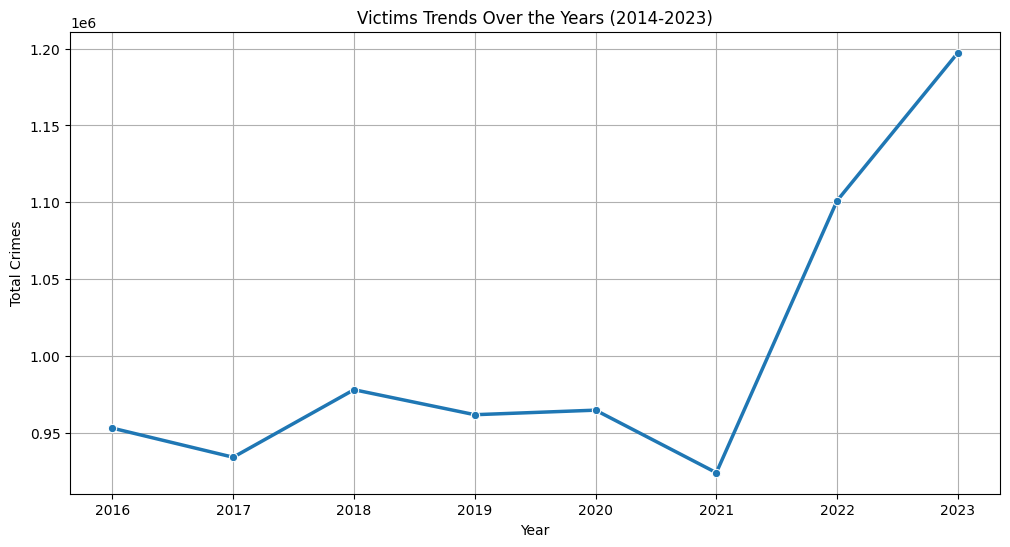

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Remove rows where 'Straftat' is 'Straftaten insgesamt'
#df_filtered= df_filtered[df_filtered['Straftat'] != 'Straftaten insgesamt']

# Group data by year to get total crimes per year
crime_trend = df_filtered.groupby('Jahr')['Oper insgesamt'].sum()

# Time Series Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=crime_trend.index, y=crime_trend.values, marker='o', linewidth=2.5)
plt.title("Victims Trends Over the Years (2014-2023)")
plt.xlabel("Year")
plt.ylabel("Total Crimes")
plt.grid(True)
plt.show()

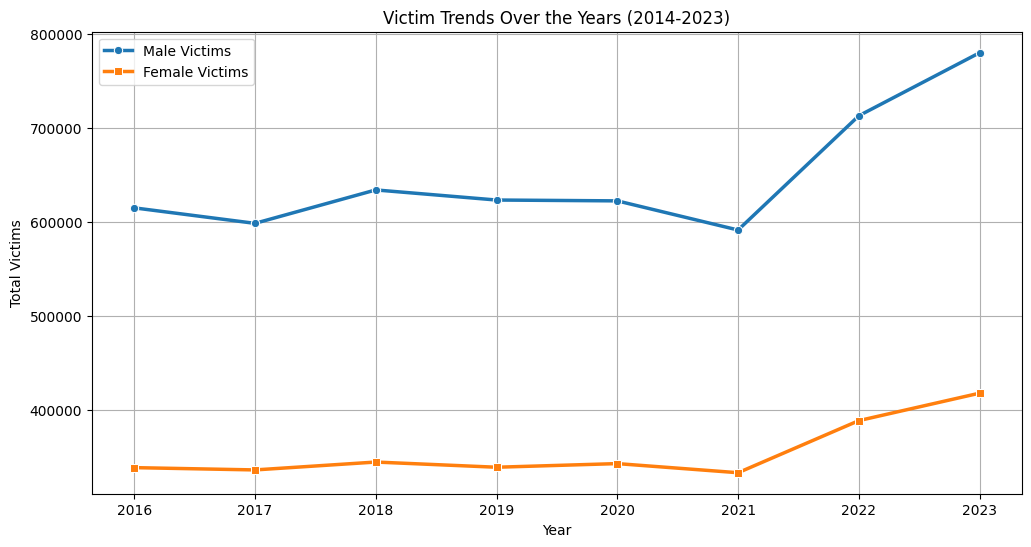

In [44]:
#df_filtered = df_filtered[df_filtered['Straftat'] != 'Straftaten insgesamt']#did you filter

# Group data by year for male and female victims
crime_trend_male = df_filtered.groupby('Jahr')['Opfer maennlich'].sum()
crime_trend_female = df_filtered.groupby('Jahr')['Opfer weiblich'].sum()

# Time Series Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=crime_trend_male.index, y=crime_trend_male.values, marker='o', label="Male Victims", linewidth=2.5)
sns.lineplot(x=crime_trend_female.index, y=crime_trend_female.values, marker='s', label="Female Victims", linewidth=2.5)

# Chart Customization
plt.title("Victim Trends Over the Years (2014-2023)")
plt.xlabel("Year")
plt.ylabel("Total Victims")
plt.legend()
plt.grid(True)
plt.show()

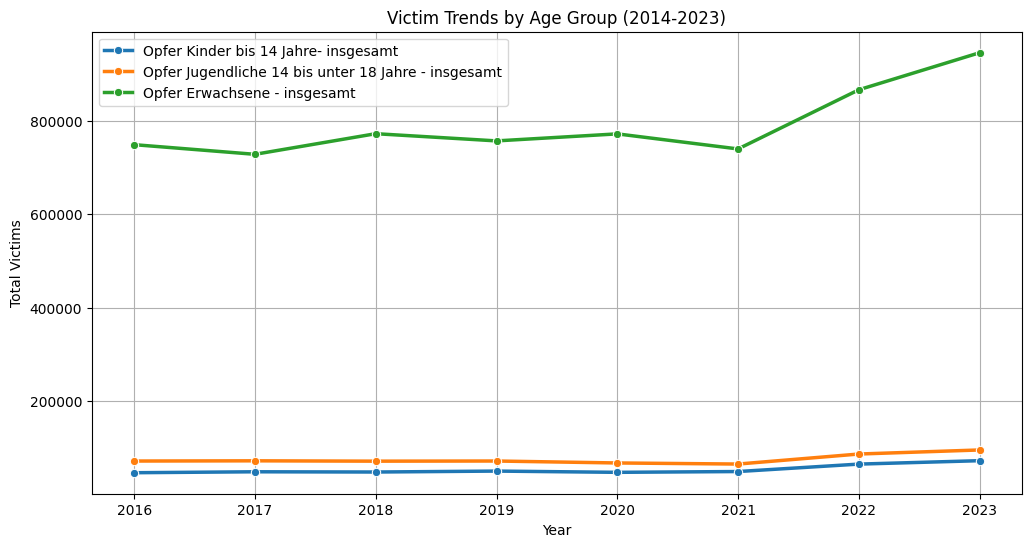

In [45]:
#df_filtered = df_filtered[df_filtered['Straftat'] != 'Straftaten insgesamt']

# Define age categories
victim_age_groups = [
    'Opfer Kinder bis 14 Jahre- insgesamt', 
    'Opfer Jugendliche 14 bis unter 18 Jahre - insgesamt', 
    'Opfer Erwachsene - insgesamt'
]

# Group data by year and sum victims per category
df_grouped = df_filtered.groupby('Jahr')[victim_age_groups].sum()

# Time Series Plot
plt.figure(figsize=(12, 6))

# Plot each age category
for age_group in victim_age_groups:
    sns.lineplot(x=df_grouped.index, y=df_grouped[age_group], marker='o', label=age_group, linewidth=2.5)
plt.title("Victim Trends by Age Group (2014-2023)")
plt.xlabel("Year")
plt.ylabel("Total Victims")
plt.legend()
plt.grid(True)
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_9360\2191081553.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_crimes.values, y=top_crimes.index, palette='viridis')
C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\PC\AppData\Roaming\Py

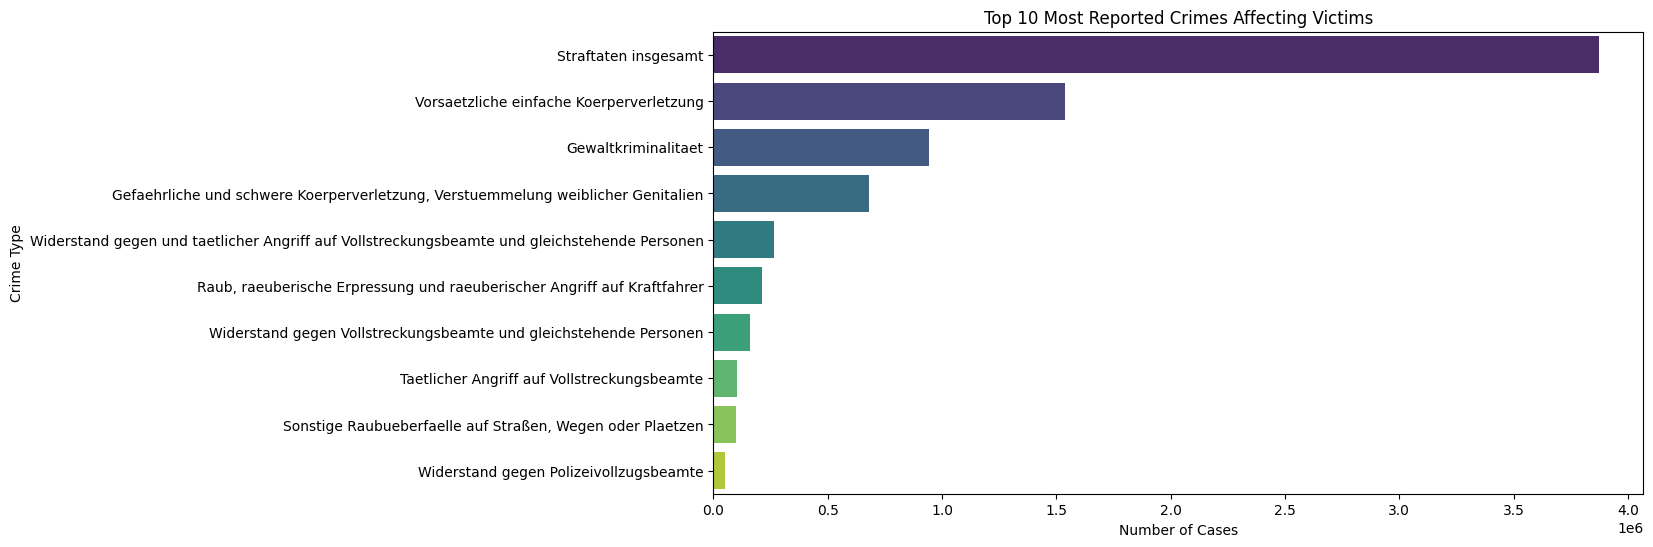

In [46]:
#Exclude "Straftaten insgesamt" before grouping
#df_filtered = df_filtered[df_filtered['Straftat'] != 'Straftaten insgesamt']

# Group and get the top 10 crimes
top_crimes = df_filtered.groupby('Straftat')['Oper insgesamt'].sum().nlargest(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_crimes.values, y=top_crimes.index, palette='viridis')
plt.title("Top 10 Most Reported Crimes Affecting Victims")
plt.xlabel("Number of Cases")
plt.ylabel("Crime Type")
plt.show()



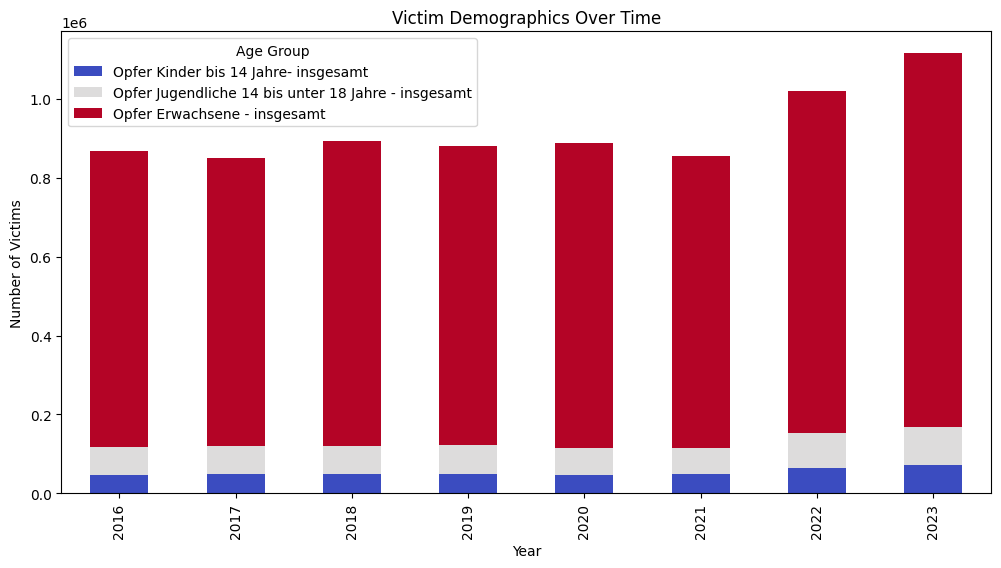

In [47]:
#df_filtered = df_filtered[df_filtered['Straftat'] != 'Straftaten insgesamt']

#df['Jahr'] = df['Jahr'].astype(int)

# Stacked Bar Chart: Victim Demographics Over Time
victim_age_groups = ['Opfer Kinder bis 14 Jahre- insgesamt', 'Opfer Jugendliche 14 bis unter 18 Jahre - insgesamt', 'Opfer Erwachsene - insgesamt']
df_grouped = df_filtered.groupby('Jahr')[victim_age_groups].sum()

df_grouped.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')
plt.title("Victim Demographics Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Victims")
plt.legend(title="Age Group")
plt.show()


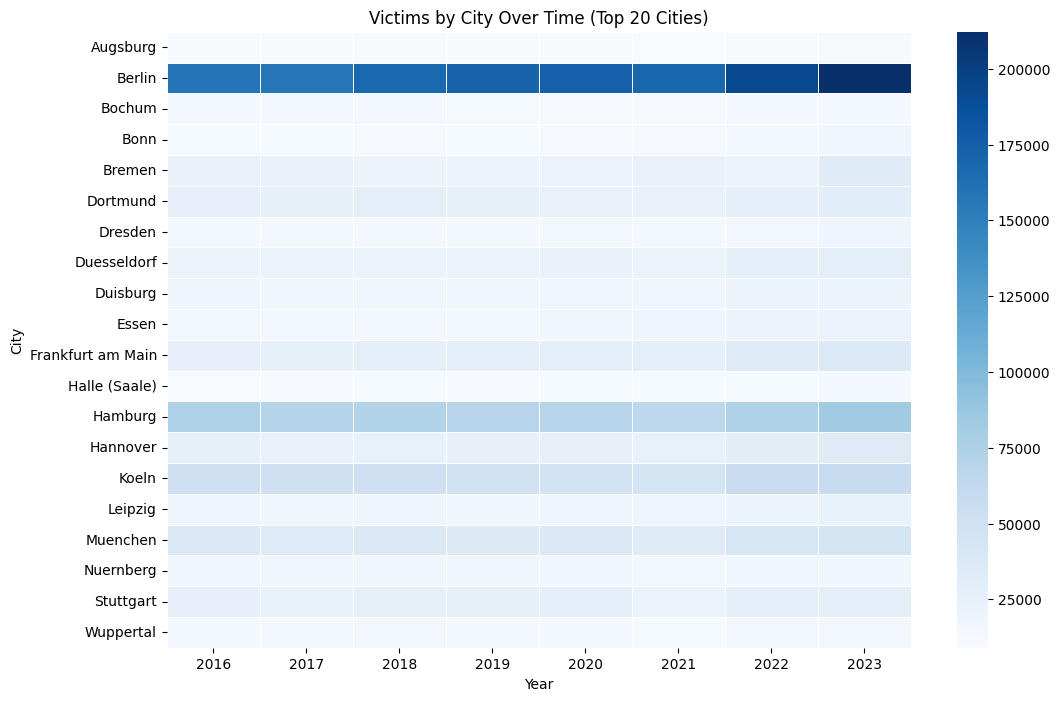

In [48]:
#getting darker and darker

#df_filtered = df_filtered[df_filtered['Straftat'] != 'Straftaten insgesamt']

top_20_cities = df_filtered.groupby('Stadt')['Oper insgesamt'].sum().nlargest(20).index

#Filter the DataFrame to Keep Only the Top 20 Cities
df_filtered_top20 = df_filtered[df_filtered['Stadt'].isin(top_20_cities)]

#Create Pivot Table
df_pivot = df_filtered_top20.pivot_table(values='Oper insgesamt', index='Stadt', columns='Jahr', aggfunc='sum', fill_value=0)

#Step 5: Plot Heatmap
plt.figure(figsize=(12, 8))  # Adjust height slightly
sns.heatmap(df_pivot, cmap='Blues', linewidths=0.5)
plt.title("Victims by City Over Time (Top 20 Cities)")
plt.xlabel("Year")
plt.ylabel("City")
plt.show()

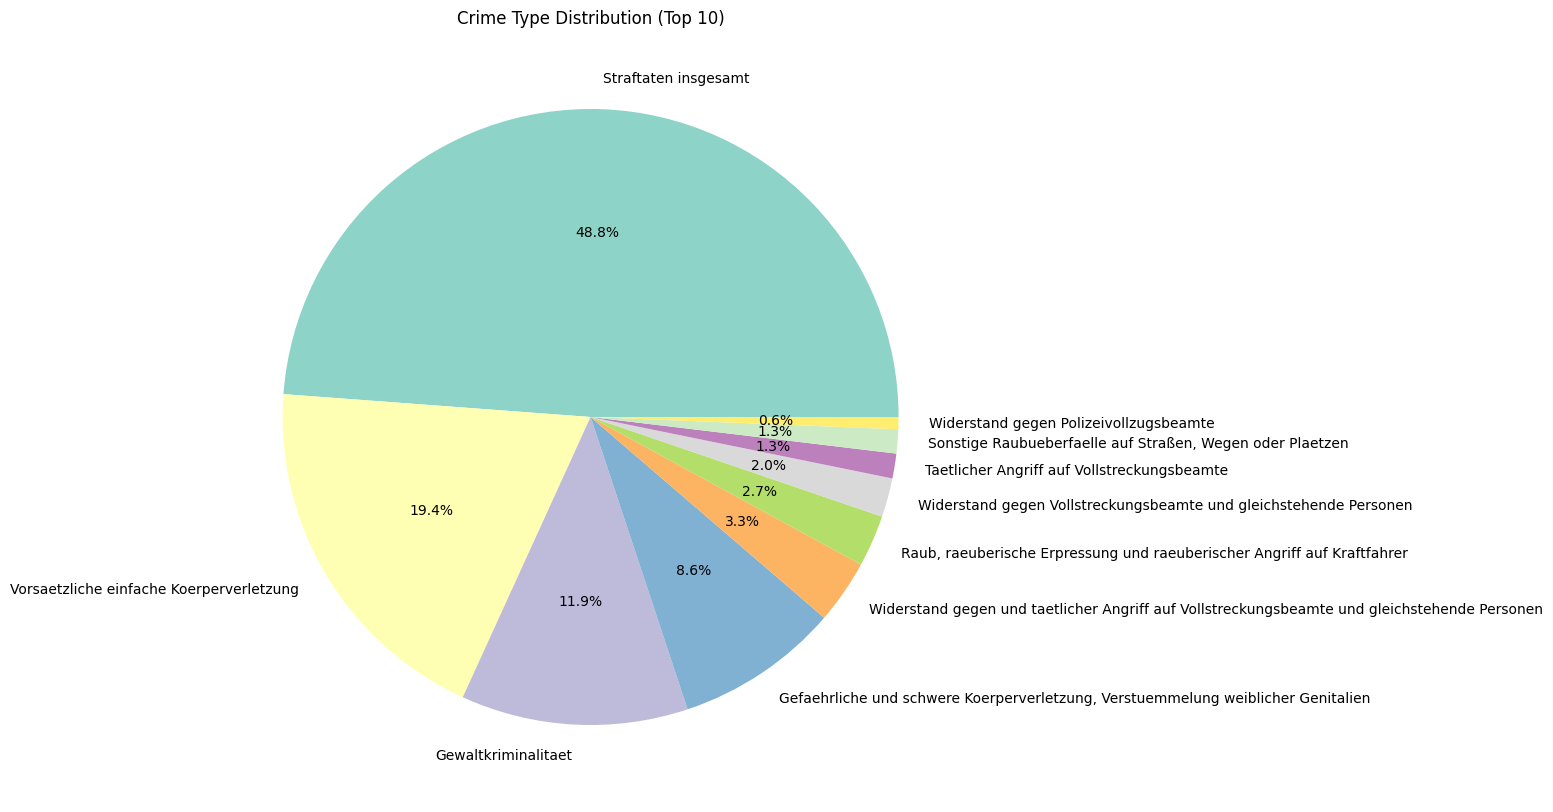

In [49]:
#Pie Chart: Crime Type Distribution
#df_filtered = df_filtered[df_filtered['Straftat'] != 'Straftaten insgesamt']
total_crime_types = df_filtered.groupby('Straftat')['Oper insgesamt'].sum()
plt.figure(figsize=(20, 10))
total_crime_types.nlargest(10).plot.pie(autopct='%1.1f%%', cmap='Set3')
plt.title("Crime Type Distribution (Top 10)")
plt.ylabel("")
plt.show()